# Distribution des effectif d'associations par événements

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from fanalysis.ca import CA 
from fanalysis.mca import MCA
# Importation du fichier csv qui se trouve dans le même dossier que le notebook
data = pd.read_csv("analyse_memoire_essai.csv")

In [16]:
display(data)

,pk_evenement,eff,date
0,1,2,1973-05-18
1,7,3,1973-05-24
2,2,4,1973-05-25
3,6,2,1973-05-28
4,8,1,1973-05-29
5,9,1,1973-06-10
6,10,4,1973-06-12
7,11,3,1973-06-13
8,13,4,1973-06-20
9,14,3,1973-06-20


# Exploration des données


In [17]:
# l'année de naissance est déjà de type int donc pas besoin de changer le type de la donnée
data["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27 entries, 0 to 26
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
27 non-null     object
dtypes: object(1)
memory usage: 348.0+ bytes


In [18]:
data.dtypes

pk_evenement     int64
eff              int64
date            object
dtype: object

In [19]:
data["pk_evenement"].count()

27

In [20]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
cdf_p = data

In [21]:
cdf_p.head(3)

,pk_evenement,eff,date
0,1,2,1973-05-18
1,7,3,1973-05-24
2,2,4,1973-05-25


In [22]:
### Année minimale et maximale dans la population
min(cdf_p['date']), max(cdf_p['date'])

('1973-05-18', '1973-10-25')

In [23]:
# Afficher les types de colonnes avant la conversion
print(cdf_p.dtypes)

pk_evenement     int64
eff              int64
date            object
dtype: object


In [24]:
cdf_p['date'] = pd.to_datetime(cdf_p['date'])

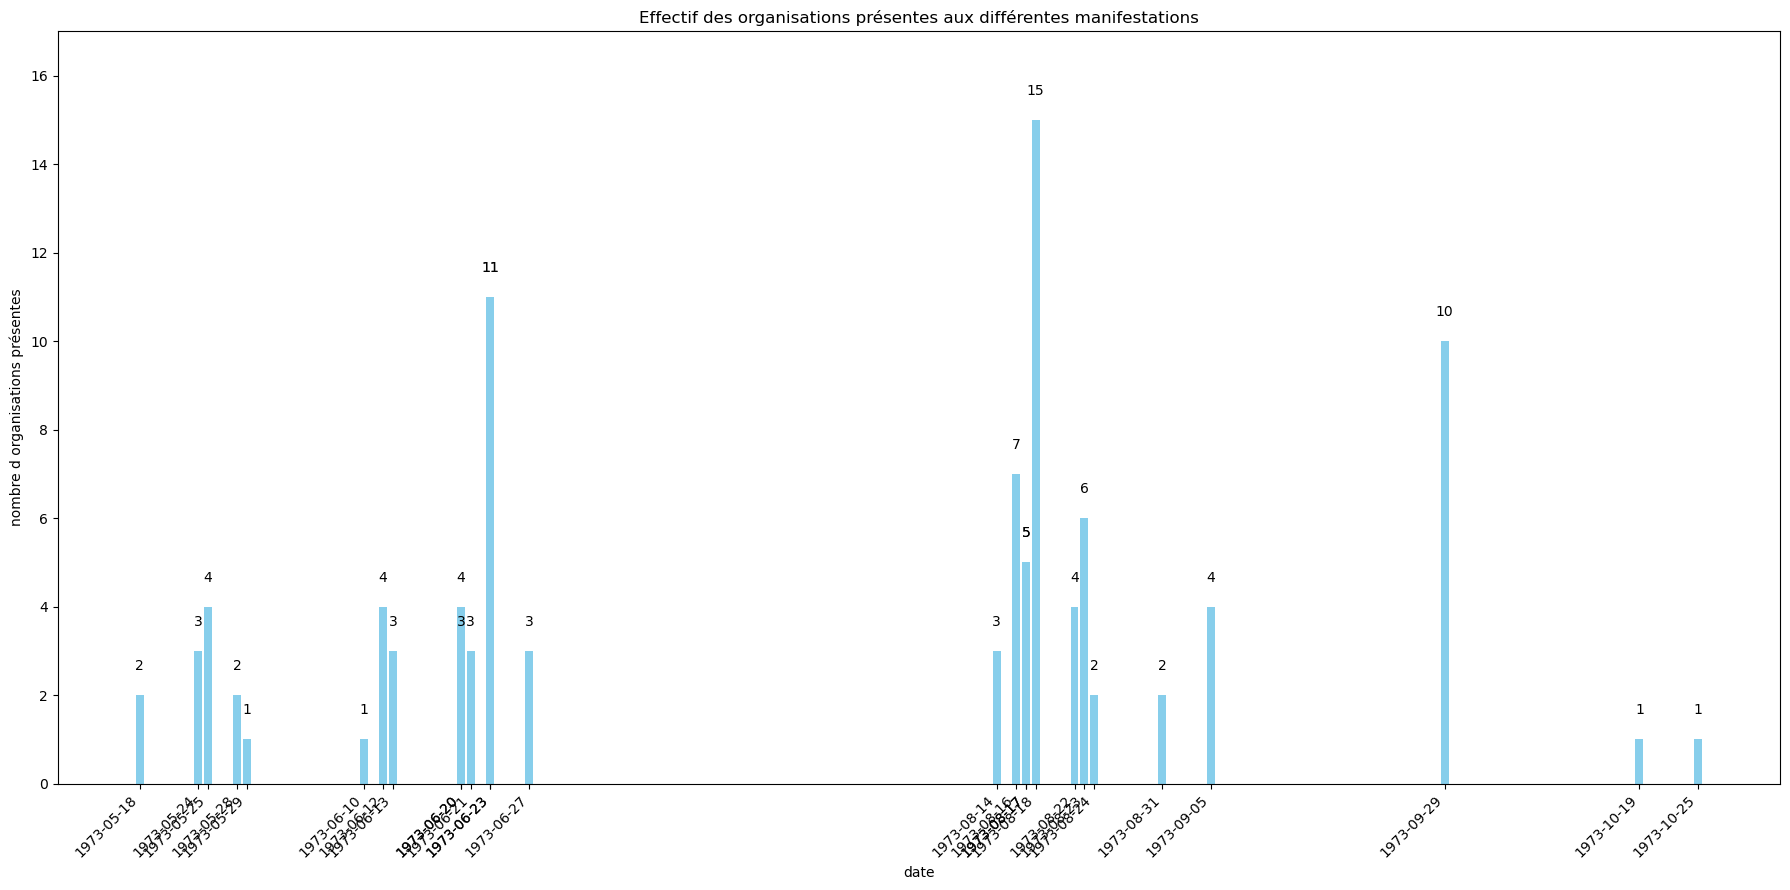

In [25]:
# Graphique des effectifs d'associations aux événements

# Définir les colonnes
x = cdf_p['date']  # Axe des x
y = cdf_p['eff']  # Axe des y

# Créer le diagramme en barres avec une couleur spécifique
plt.figure(figsize=(18, 9))  # Ajuster la taille de la figure
bars = plt.bar(x, y, color='skyblue')  # Change 'skyblue' par la couleur de ton choix

plt.ylim(0, 17)

# Ajouter des labels et un titre
plt.xlabel('date')
plt.ylabel('nombre d organisations présentes')
plt.title('Effectif des organisations présentes aux différentes manifestations')

# Afficher toutes les dates sur l'axe x, mais espacer
plt.xticks(ticks=x, labels=x.dt.strftime('%Y-%m-%d'), rotation=45, ha='right')  # Étiquettes à droite

# Ajouter les annotations sur les barres
for bar in bars:
    yval = bar.get_height()  # Récupérer la hauteur de la barre
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')
    
# Améliorer la mise en page
plt.tight_layout()
plt.show()
